# Capstone - PGPDSE-FT Gurgaon Apr19
Group Name: Group Connected Clouds

Domain: Retail Analytics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [2]:
cust_details=pd.read_csv('CUSTOMER_DETAILS.csv')

In [3]:
loc_details=pd.read_csv('LOCATIONS_DETAILS.csv')

In [4]:
prod_details=pd.read_csv('PRODUCT_DETAILS.csv')

In [5]:
cust_details.head(5)

,User_ID,Gender,Age,Occupation
0,1000001,F,0-17,10
1,1000001,F,0-17,10
2,1000001,F,0-17,10
3,1000001,F,0-17,10
4,1000002,M,55+,16


In [6]:
loc_details.head(5)

,User_ID,City_Category,Stay_In_Current_City_Years
0,1000001,A,2
1,1000001,A,2
2,1000001,A,2
3,1000001,A,2
4,1000002,C,4+


In [7]:
prod_details.head(5)

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,3,NaN,NaN,8370
1,1000001,P00248942,1,6.0,14.0,15200
2,1000001,P00087842,12,NaN,NaN,1422
3,1000001,P00085442,12,14.0,NaN,1057
4,1000002,P00285442,8,NaN,NaN,7969


In [8]:
cust_details.shape

(537577, 4)

In [9]:
prod_details.shape

(537577, 6)

In [10]:
loc_details.shape

(537577, 3)

In [11]:
cust_details=cust_details.drop_duplicates()

In [12]:
prod_details=prod_details.drop(['Product_Category_2','Product_Category_3'],axis=1)
prod_details=prod_details.drop_duplicates()

In [13]:
loc_details=loc_details.drop_duplicates()

In [14]:
cust_details.shape

(5891, 4)

In [15]:
prod_details.shape

(537577, 4)

In [16]:
loc_details.shape

(5891, 3)

In [17]:
interim_dataset = pd.DataFrame.merge(cust_details,loc_details,on='User_ID')

In [18]:
interim_dataset.head(5)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years
0,1000001,F,0-17,10,A,2
1,1000002,M,55+,16,C,4+
2,1000003,M,26-35,15,A,3
3,1000004,M,46-50,7,B,2
4,1000005,M,26-35,20,A,1


In [19]:
final_dataset = pd.DataFrame.merge(interim_dataset,prod_details,on='User_ID')

In [20]:
final_dataset.head(5)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Purchase
0,1000001,F,0-17,10,A,2,P00069042,3,8370
1,1000001,F,0-17,10,A,2,P00248942,1,15200
2,1000001,F,0-17,10,A,2,P00087842,12,1422
3,1000001,F,0-17,10,A,2,P00085442,12,1057
4,1000001,F,0-17,10,A,2,P00085942,2,12842


In [21]:
final_dataset.shape

(537577, 9)

In [22]:
pp.ProfileReport(final_dataset)

Number of variables,9
Number of observations,537577
Total Missing (%),0.0%
Total size in memory,41.0 MiB
Average record size in memory,80.0 B
Numeric,4
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Convert Gender from Categorical to Numeric

In [23]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
final_dataset['Gender'] = final_dataset['Gender'].apply(map_gender)

# Convert Age from Categorical to Numeric

In [24]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
final_dataset['Age'] = final_dataset['Age'].apply(map_age)

# Convert City_Category from Categorical to Numeric

In [25]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
final_dataset['City_Category'] = final_dataset['City_Category'].apply(map_city_categories)

# Convert Stay_In_Current_City_Years from Categorical to Numeric

In [26]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
final_dataset['Stay_In_Current_City_Years'] = final_dataset['Stay_In_Current_City_Years'].apply(map_stay)    

## Now my data set should be left with just 1 Categorical variable

In [27]:
pp.ProfileReport(final_dataset)

Number of variables,9
Number of observations,537577
Total Missing (%),0.0%
Total size in memory,41.0 MiB
Average record size in memory,80.0 B
Numeric,7
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [28]:
final_dataset.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Purchase
0,1000001,0,0,10,2,2,P00069042,3,8370
1,1000001,0,0,10,2,2,P00248942,1,15200
2,1000001,0,0,10,2,2,P00087842,12,1422
3,1000001,0,0,10,2,2,P00085442,12,1057
4,1000001,0,0,10,2,2,P00085942,2,12842


## Product_ID has 3623 unique values. We cannot convert it to numerical due to high cardinality

## **************Now we have the converted dataset available for analysis**************

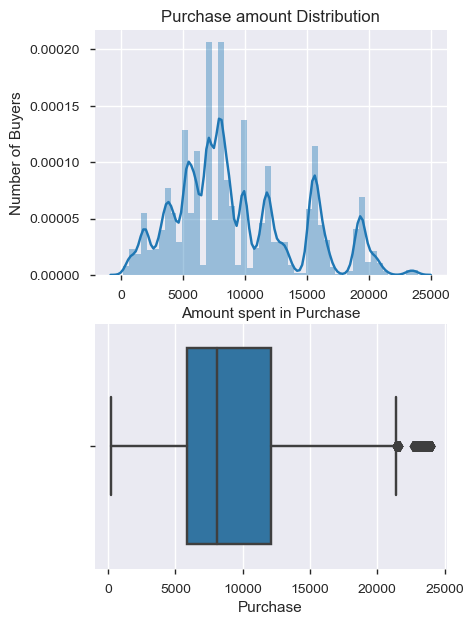

In [29]:
# Purchase V.s. Number of Buyers

plt.figure(figsize=(10,7))
plt.subplot(221)
sns.distplot(final_dataset.Purchase)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")
plt.subplot(223)
sns.boxplot(final_dataset.Purchase)

In [30]:
# Gender distribution

final_dataset.Gender.value_counts(sort=True)

1    405380
0    132197
Name: Gender, dtype: int64

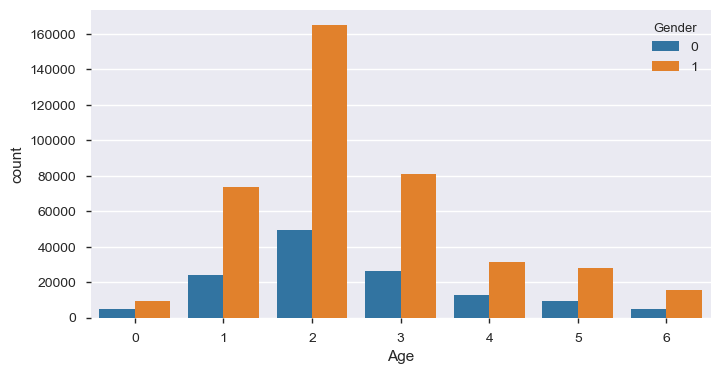

In [31]:
# Gender and Age distribution

plt.figure(figsize=(8,4))
sns.countplot(final_dataset.Age,hue=final_dataset.Gender)

1. Futher we can make inference that majority users are between age group 26-35 and within that majority users are Male.
2. We can observe that the highest number of customers belong to the age group between 26 and 35, for both genders. Younger and older population are far less represented on Black Friday. Based on these results, the retail store should sell most of the products that target people in their late twenties to early thirties. To increase profits, the number of products targeting people around their thirties can be increased while the number of products that target the older or younger population can be reduced.

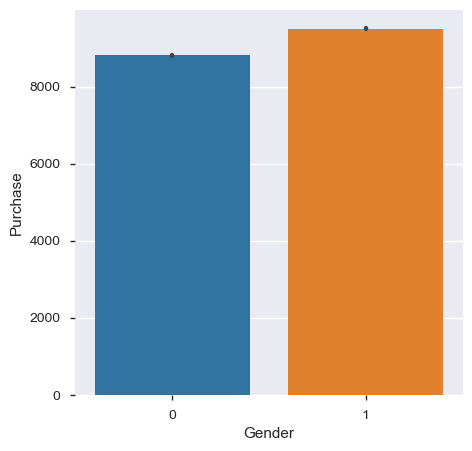

In [32]:
# Gender Vs Purchase

plt.figure(figsize=(5,5))
sns.barplot(x="Gender",y="Purchase", data=final_dataset)


Here we can say that Men spend more on Black Friday Sale as majority customers are Male,but Female Customers have high purchase amount as compared to ratio of male and female customers.

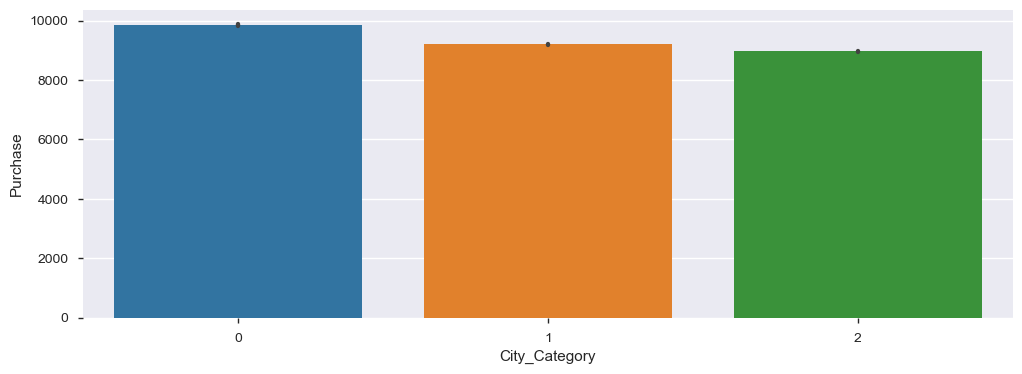

In [33]:
# City Category vs Purchase
plt.figure(figsize=(12,4))
sns.barplot(x="City_Category",y="Purchase", data=final_dataset)

Majority Customers (almost double) are from City Category B But there purchase are lesser than the customers from City Category C.It can imply that these groups are the poorest ones,hence they spend less on Black Friday Sale.

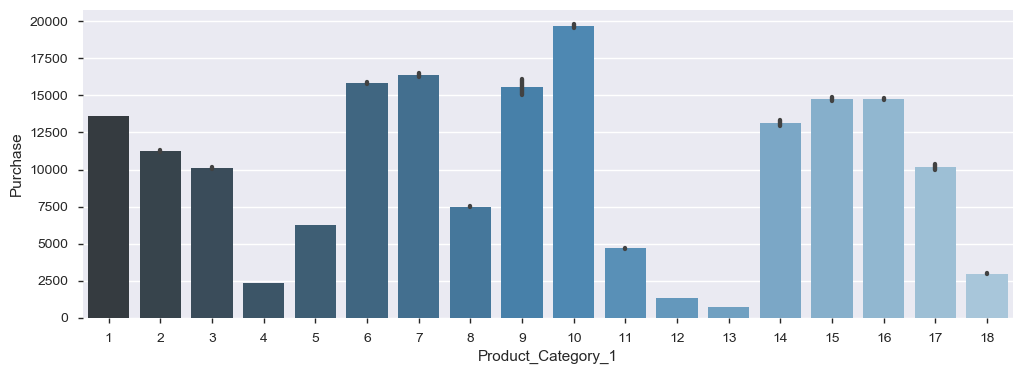

In [34]:
# Product Category vs Purchase
plt.figure(figsize=(12,4))
sns.barplot(x="Product_Category_1",y="Purchase", data=final_dataset,palette="Blues_d")

Product Category 5 and 8 have the highest quantity of sales but doesn't generate much revenue compared to Product category 10 which have the highest amount as compared to other,so it might be a costly item hence it less purchased compared to others.Product Category 1 have high quantity of sales as well as purchase price so it might be a medium range product which is purchased more during Black friday Sale.

## Top 10 purchased products

In [35]:
final_dataset.Product_ID.value_counts(sort=True)[:10]

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
Name: Product_ID, dtype: int64

## Top 10 products with highest sales

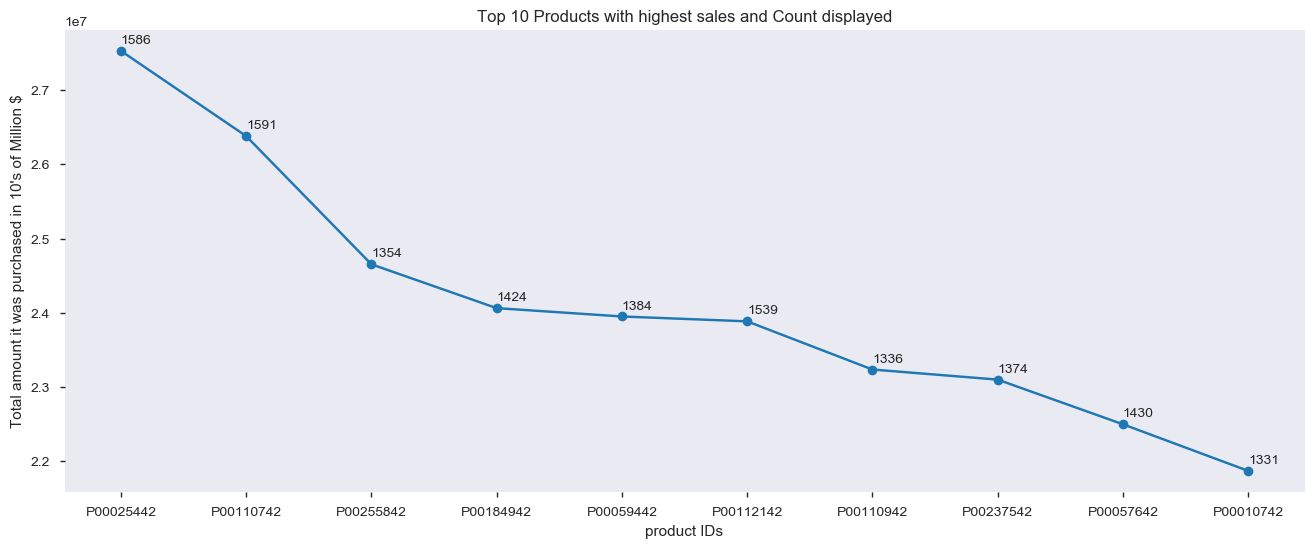

In [36]:
data1 = final_dataset.groupby('Product_ID').agg({'Purchase':'sum'}).reset_index()
data2 = final_dataset['Product_ID'].value_counts()
data2 = pd.DataFrame({'Product_ID':data2.index, 'Count':data2.values})
data = pd.merge(data1,data2,left_on='Product_ID',right_on='Product_ID',how = 'left');
data = data.sort_values(['Purchase'],ascending=False)[0:10];
plt.figure(figsize=(16,6));
plt.grid();
plt.plot(data['Product_ID'],data['Purchase'],'o-');
plt.xlabel('product IDs');
plt.ylabel('Total amount it was purchased in 10\'s of Million $');
plt.title('Top 10 Products with highest sales and Count displayed');
for a,b,c in zip(data['Product_ID'], data['Purchase'], data['Count']): 
    plt.text(a, b+100000, str(c))  
plt.show();

We can see 10 products their purchase amount and count of products saled.

1. 1st product has 1586 pieces sold with total sale of 27.5 million and 2nd product with 1591 pieces sold but with 26.5 million. which means 1st product might have higher product cost.

2. 3rd product has 1354 units sold and 4th product has 1424 units sold but 4th product has low price than 3rd product so even it has higher products sold it has lesser sale amount than 3rd.

## Which age group of customers are more likely to purchase ?

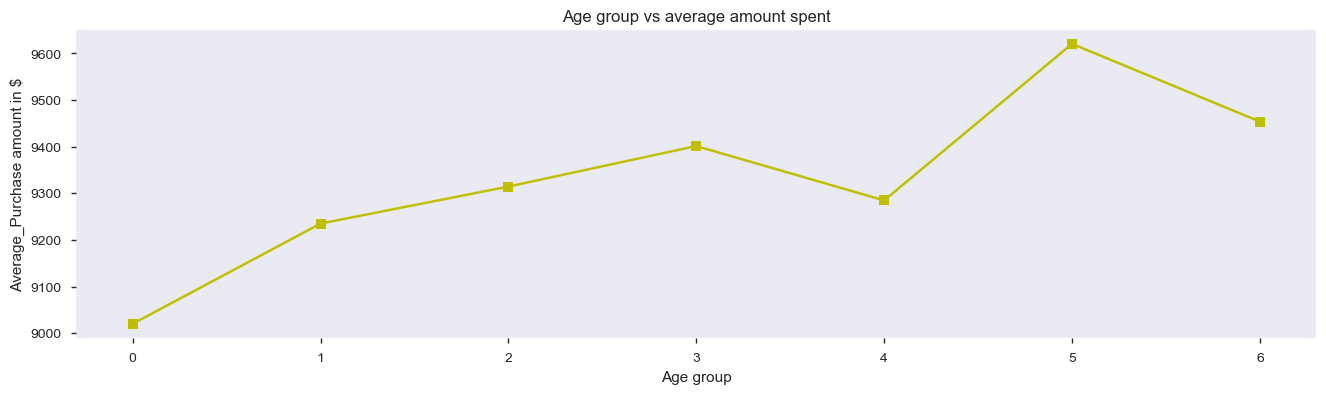

In [37]:
data = final_dataset.groupby('Age')['Purchase'].mean()
data  = pd.DataFrame({'Age':data.index, 'Average_purchase':data.values})
plt.figure(figsize = (16,4))
plt.plot('Age','Average_purchase','ys-',data = data);
plt.grid();
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');
plt.title('Age group vs average amount spent');

So category 5 i.e. Age Group 51-55 years spent most on average being 9600$. The graph values tends to increase. so higher the age group higher the intrest in the sale.But there is a slight purchase variation in 46-50 and 50-55 age people.

We can hereby infer that 60% of customers from 26-45 who have a medium purchase rate. 7% of customers are from 51-55 who have high purchase rate.

## Which product is popular for each age group

In [38]:
data1 = final_dataset.groupby('Age')['Product_ID'].apply(lambda x: x.value_counts().index[0]).reset_index()
data1

,Age,Product_ID
0,0,P00255842
1,1,P00265242
2,2,P00265242
3,3,P00025442
4,4,P00265242
5,5,P00265242
6,6,P00265242


The product P00265242 has attracted most age groups. From 18-35,46-55+ all of them have this product has highest purchased in their age group. For Age group 0-17 P00255842 is more frequently purchased and for 36-45 P00025442 is most frequently purchased

## Which occupation type have high purchase rate

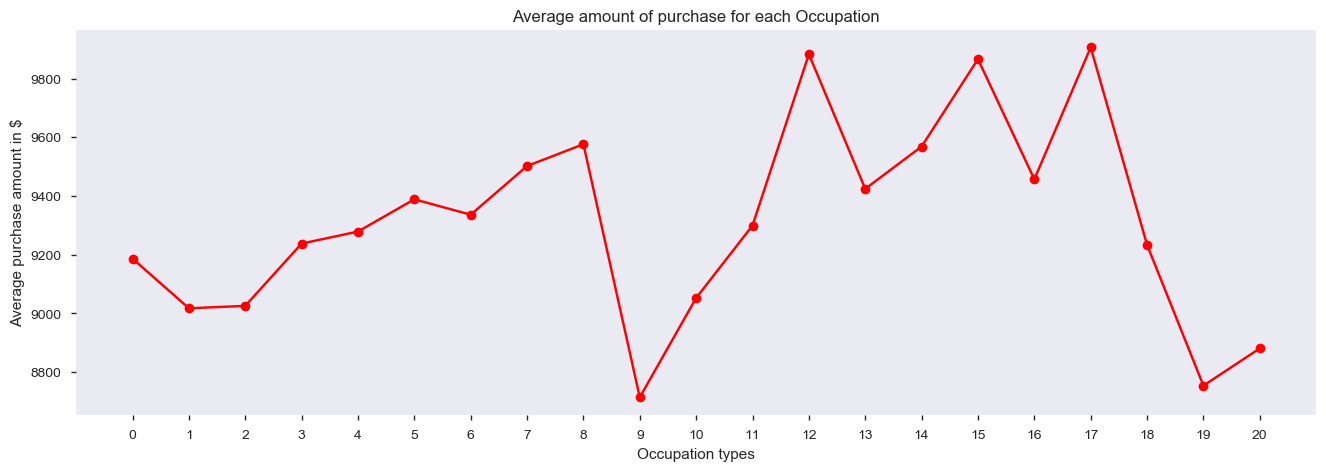

In [39]:
data = final_dataset.groupby('Occupation')['Purchase'].mean();
plt.figure(figsize=(16,5));
plt.grid();
plt.plot(data.index,data.values,'ro-');
plt.xlabel('Occupation types');
plt.ylabel('Average purchase amount in $');
plt.title('Average amount of purchase for each Occupation');
plt.xticks(data.index);

There are few points to observe from these plots

1. Occupation type 12,15,17 have high purchase rates but no of people with those occupations are not in large amount.
2. Occupations 0,4 and 7 have higghest amount of people but their average amount of purchases are less.
3. If we observe occupation 8 and 9 no of people in 8 and lesser than in 9 but the average spending of occupation 8 is roughly 800 dollars more than occupation 9.
4. If we observe 11 adn 12 total people and average spending both are more for 12. So no of people is not correlated with purchase.
5. Occupation 8 which doesnot even have 10,000 no of people have average spending just 300 dollars less than occupation 17 with 40,000 people. So occupation 8 looks like heavy spenders.
6. occupation 4 which has highest amount of people has spending 600 dollars less than the highest Spender.
7. occuption 1 has 20,000 more people than occupation 2 but they seem to have roughly same amount of spending.

## Stay in City behavior on Purchase

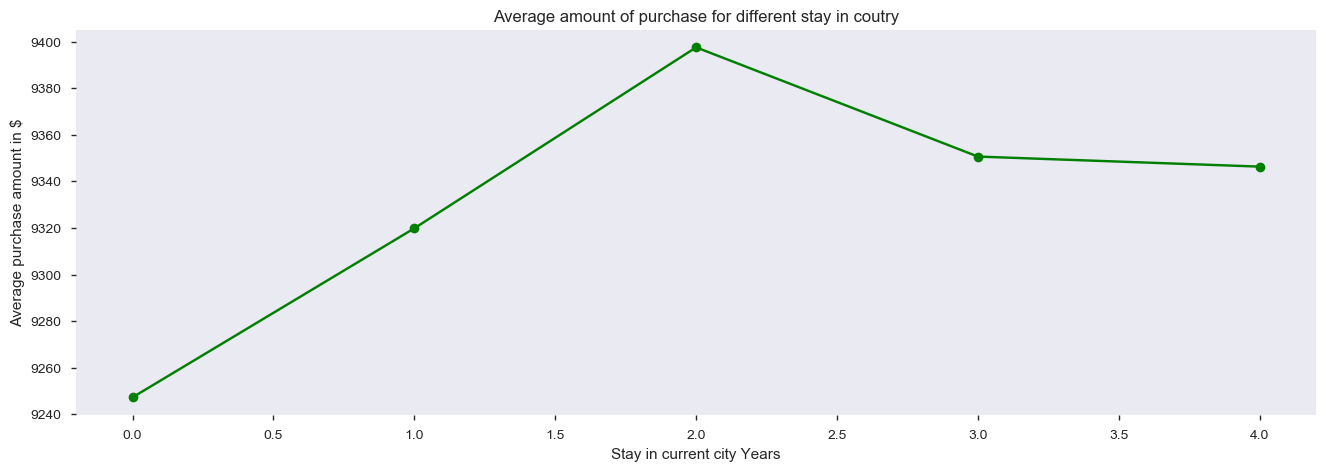

In [40]:
data = final_dataset.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.figure(figsize=(16,5));
plt.grid();
plt.plot(data.index,data.values,'go-');
plt.xlabel('Stay in current city Years');
plt.ylabel('Average purchase amount in $');
plt.title('Average amount of purchase for different stay in coutry');

People who are 2 years residents spent more on average in the sale.Even though the 1 year reisdents visited more in sale they have not spent much but 2 years residents who are around 100,000 people visited, each have spent 9400$ on average

# EDA is now complete

Final outcome of the EDA is as below :

1. From the purchasing capacity of customers, it can be inferred that there exists customers of 3 chunks: low range customers, mid-range customers and high range customers and the boxplot shows that mean of the distribution is greater than the median so there might be outliers or extreme values.
2. Number of male customers are huge when compared to number of female customers. Here we can say that Men spend more on Black Friday Sale as majority customers are Male,but Female Customers have high purchase amount as compared to ratio of male and female customers.
3. From the distribution for products from category one, it is clear that three products stand out, number 1, 5 and 8. Unfortunately, we do not know which product each number represents.
4. Futher we can make inference that majority users are between age group 26-35 and within that majority users are Male.
5. We can observe that the highest number of customers belong to the age group between 26 and 35, for both genders. Younger and older population are far less represented on Black Friday. Based on these results, the retail store should sell most of the products that target people in their late twenties to early thirties. To increase profits, the number of products targeting people around their thirties can be increased while the number of products that target the older or younger population can be reduced.
6. Majority Customers (almost double) are from City Category B But there purchase are lesser than the customers from City Category C.It can imply that these groups are the poorest ones,hence they spend less on Black Friday Sale.
7. Product Category 5 and 8 have the highest quantity of sales but doesn't generate much revenue compared to Product category 10 which have the highest amount as compared to other,so it might be a costly item hence it less purchased compared to others.Product Category 1 have high quantity of sales as well as purchase price so it might be a medium range product which is purchased more during Black friday Sale.
8. Top 10 Purchased Products are :
   P00265242, P00110742, P00025442, P00112142, P00057642, P00184942, P00046742, P00058042, P00145042, P00059442
9. Top 10 Product generating Revenue
   1. 1st product has 1586 pieces sold with total sale of 27.5 million and 2nd product with 1591 pieces sold but with 26.5           million. which means 1st product might have higher product cost.
   2. 3rd product has 1354 units sold and 4th product has 1424 units sold but 4th product has low price than 3rd product so           even it has higher products sold it has lesser sale amount than 3rd.
10. The product P00265242 has attracted most age groups. From 18-35,46-55+ all of them have this product has highest purchased in their age group. For Age group 0-17 P00255842 is more frequently purchased and for 36-45 P00025442 is most frequently purchased.
11. Age Group 51-55 years spent most on average being 9600$. The graph values tends to increase. so higher the age group higher the intrest in the sale.But there is a slight purchase variation in 46-50 and 50-55 age people.

We can hereby infer that 60% of customers from 26-45 who have a medium purchase rate. 7% of customers are from 51-55 who have high purchase rate.
12. Occupation Vs. Purchase findings:
    1. Occupation type 12,15,17 have high purchase rates but no of people with those occupations are not in large amount.
    2. Occupations 0,4 and 7 have higghest amount of people but their average amount of purchases are less.
    3. If we observe occupation 8 and 9 no of people in 8 and lesser than in 9 but the average spending of occupation 8 is            roughly 800 dollars more than occupation 9.
    4. If we observe 11 adn 12 total people and average spending both are more for 12. So no of people is not correlated with           purchase.
    5. Occupation 8 which doesnot even have 10,000 no of people have average spending just 300 dollars less than occupation 17        with 40,000 people. So occupation 8 looks like heavy spenders.
    6. occupation 4 which has highest amount of people has spending 600 dollars less than the highest Spender.
    7. occuption 1 has 20,000 more people than occupation 2 but they seem to have roughly same amount of spending.
13. People who are 2 years residents spent more on average in the sale.Even though the 1 year reisdents visited more in sale they have not spent much but 2 years residents who are around 100,000 people visited, each have spent 9400$ on average

# Machine Learning implementation

# Problem Set 1
Predict the "Gender" of the customer using "Purchase" value and "Occupation" type 

## Solution - For classification we can use below algorithms

1. Logistic Regression
2. CART
3. Random Forest
4. KNN

In [41]:
data_knn = final_dataset[['Occupation','Gender', 'Purchase']]
data_knn.shape

(537577, 3)

In [42]:
#Since KNN algorithm is slow so we will predict accuracy for 10 % of dataset only

train_data_knn = data_knn.sample(frac=0.10, random_state=99)
train_data_knn.shape

(53758, 3)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = train_data_knn.loc[:,train_data_knn.columns != 'Gender'], train_data_knn.loc[:,'Gender']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction : {}'.format(prediction))
print('With KNN (K=3) accuracy is: ', knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.6803695436507936


In [44]:
#Best K value selection
neig = np.arange(1,30)
train_accuracy = []
test_accuracy = []
for i, k in enumerate (neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

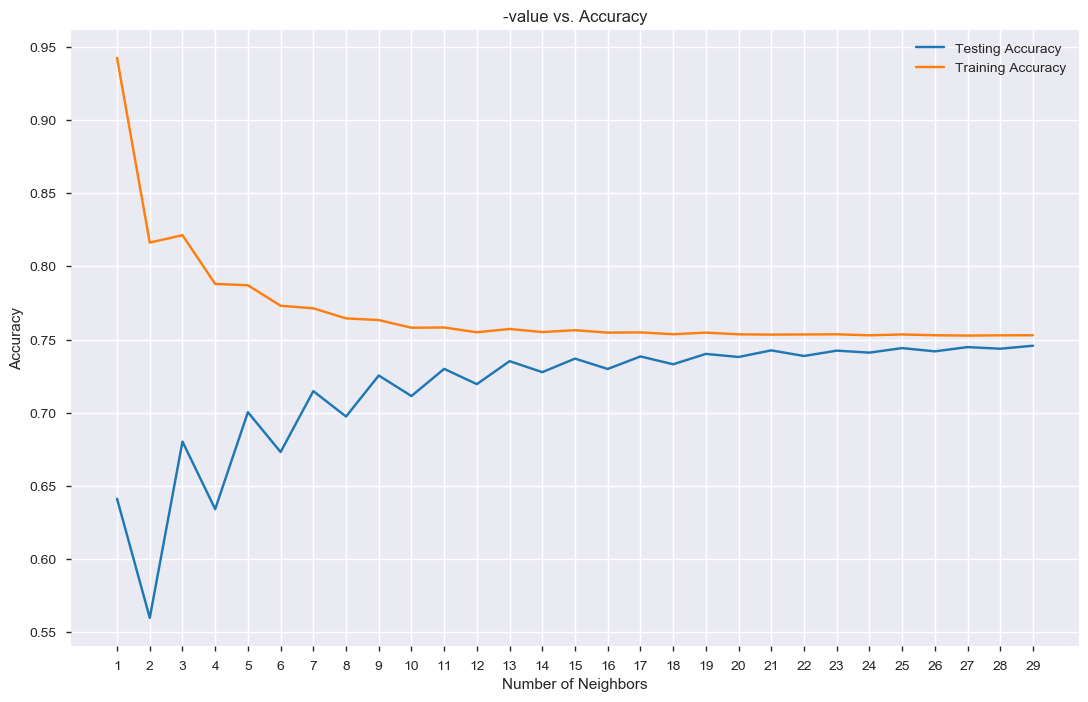

Best Accuracy is 0.7458457341269841 with K = 29


In [45]:
# Plot
plt.figure(figsize=(13,8))
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value vs. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# Conclusion

As a result, we can say that using KNN algorithm with K=29, we can estimate the "Gender" of a person from her/his "Purchase" value and "Occupation" type with 75% accuracy.

# Implementation of Random Forest Classifier with feature importance to predict Gender

In [46]:
# Product_ID is a categorical column so should be dropped
data_rfc = final_dataset.drop('Product_ID',axis=1)
data_rfc = data_rfc.sample(frac=0.10, random_state=99)
data_rfc.shape

(53758, 8)

In [47]:
# Gender is our prediction column

from sklearn.model_selection import train_test_split
Y = data_rfc['Gender']
X = data_rfc.drop(['Gender'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
model_rfc = RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999)
RFC_fit = model_rfc.fit(X, Y)

In [48]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6840277777777778


In [49]:
# To improve accuracy we will extract feature importances and drop features that are not important

fi = pd.DataFrame({'feature': list(X.columns),
                   'importance': RFC_fit.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()

,feature,importance
0,User_ID,0.407005
6,Purchase,0.169829
2,Occupation,0.150338
1,Age,0.086566
4,Stay_In_Current_City_Years,0.080797


## Hence it is observed that User_ID, Purchase and Occupation columns are important features to predict Gender

In [50]:
#Generating the Model on Selected Features

from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=data_rfc[['User_ID','Purchase','Occupation']]  # Removed features "Age" and "Stay_In_Current_City_Years"
y=data_rfc['Gender']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [51]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8322393771092982


Improved accuracy from 68 % to 83 %

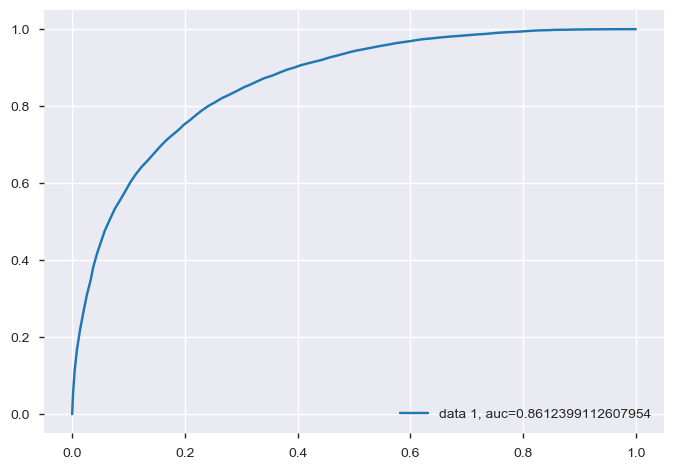

In [52]:
# AUC Curve
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score, cross_val_predict

data_rfc = final_dataset[['Occupation','Gender', 'Purchase']]
data_rfc = data_rfc.sample(frac=0.10, random_state=99)
X = data_rfc
y = data_rfc['Gender']
y_predict =cross_val_predict(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X, y, cv=10)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y, y_predict)

No handles with labels found to put in legend.


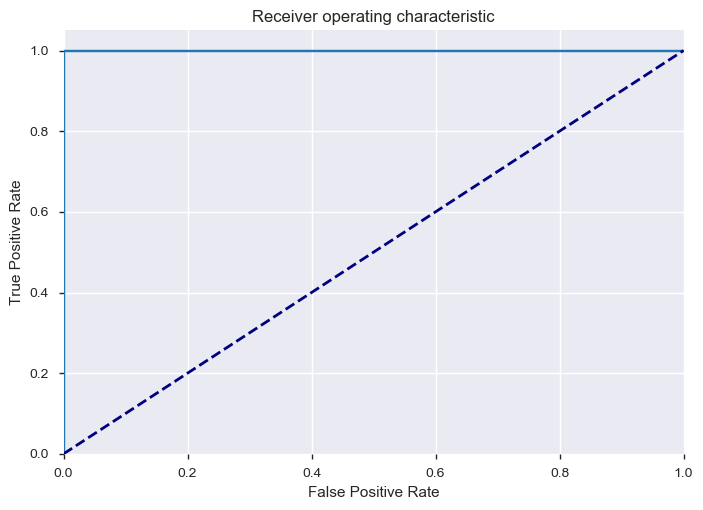

In [55]:
lw =2
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion

So we can observe better accuracy of Random Forest Classifier than KNN to predict Gender

# Problem Set 2
Build a model to predict the purchase amount of various products by users across categories given historic data of purchase amounts which will help the store to create personalized offer for customers against different products

User_ID is is the number assigned automatically to each customer, and it is not useful for prediction purposes.

The Product_ID column contains information about the product purchased. It is not a feature of the customer. Therefore, we will remove that too.

In [56]:
model = final_dataset.drop(['User_ID','Product_ID'], axis=1)
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 7 columns):
Gender                        537577 non-null int64
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Product_Category_1            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(7)
memory usage: 52.8 MB


## Linear regression model, to predict the amount spent by the customer on Black Friday

In [57]:
X = model[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Product_Category_1']]
y = model['Purchase']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # Splitting dataset into 60% train 40% test

In [59]:
# training our dataset

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.fit(X_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [60]:
# Performance Estimation of ML model
# Use the test data as inputs of the model to see how well our model performs

predictions = lm.predict(X_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [11911.29233732  9673.39697196  8944.71204911 ... 10654.14925963
 11310.92620572 11369.92630627]


In [61]:
from sklearn import metrics

print('MAE using Linear Regression:', metrics.mean_absolute_error(y_test, predictions))
print('MSE using Linear Regression:', metrics.mean_squared_error(y_test, predictions))

MAE using Linear Regression: 3615.735336058799
MSE using Linear Regression: 22075920.333511125


## Similarly we will try to compare various Machine Learning Algorithms to find train and test accuracy

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [63]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()

In [64]:
fit1 = lr.fit(X_train,y_train)#Here we fit training data to linear regressor
fit2 = dtr.fit(X_train,y_train)#Here we fit training data to Decision Tree Regressor
fit3 = rfr.fit(X_train,y_train)#Here we fit training data to Random Forest Regressor
fit4 = gbr.fit(X_train,y_train)#Here we fit training data to Gradient Boosting Regressor
fit5 = xgb.fit(X_train,y_train)#Here we fit training data to XGBRegressor

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:32:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [65]:
print("Accuracy Score of Linear regression on train set",fit1.score(X_train,y_train)*100)
print("Accuracy Score of Decision Tree on train set",fit2.score(X_train,y_train)*100)
print("Accuracy Score of Random Forests on train set",fit3.score(X_train,y_train)*100)
print("Accuracy Score of Gradient Boosting on train set",fit4.score(X_train,y_train)*100)
print("Accuracy Score of XGBRegressor on train set",fit5.score(X_train,y_train)*100)

Accuracy Score of Linear regression on train set 10.482070642197916
Accuracy Score of Decision Tree on train set 68.14554949266449
Accuracy Score of Random Forests on train set 67.85844644596699
Accuracy Score of Gradient Boosting on train set 63.35605935124601
Accuracy Score of XGBRegressor on train set 63.35059267280614


In [66]:
print("Accuracy Score of Linear regression on test set",fit1.score(X_test,y_test)*100)
print("Accuracy Score of Decision Tree on test set",fit2.score(X_test,y_test)*100)
print("Accuracy Score of Random Forests on test set",fit3.score(X_test,y_test)*100)
print("Accuracy Score of Gradient Boosting on testset",fit4.score(X_test,y_test)*100)
print("Accuracy Score of XGBRegressor on testset",fit5.score(X_test,y_test)*100)

Accuracy Score of Linear regression on test set 10.619943243317065
Accuracy Score of Decision Tree on test set 63.412917138272064
Accuracy Score of Random Forests on test set 63.89586664100152
Accuracy Score of Gradient Boosting on testset 63.1266329658662
Accuracy Score of XGBRegressor on testset 63.118839832639026


In [67]:
# Performance Estimation of ML models
# Use the test data as inputs of the models to see how well our models perform

predictions_lr = fit1.predict(X_test)
print("**Logistic Regression - Predicted purchases (in dollars) for new costumers:", predictions_lr)
predictions_dt = fit2.predict(X_test)
print("**Decision Tree - Predicted purchases (in dollars) for new costumers:", predictions_dt)
predictions_rf = fit3.predict(X_test)
print("**Random Forest - Predicted purchases (in dollars) for new costumers:", predictions_rf)
predictions_gb = fit4.predict(X_test)
print("**Gradient Boosting - Predicted purchases (in dollars) for new costumers:", predictions_gb)
predictions_xgb = fit5.predict(X_test)
print("**XGBRegressor - Predicted purchases (in dollars) for new costumers:", predictions_xgb)

**Logistic Regression - Predicted purchases (in dollars) for new costumers: [11911.29233732  9673.39697196  8944.71204911 ... 10654.14925963
 11310.92620572 11369.92630627]
**Decision Tree - Predicted purchases (in dollars) for new costumers: [15136.51612903  6909.89041096  8003.66666667 ... 11796.95833333
 14054.55670103 15807.26315789]
**Random Forest - Predicted purchases (in dollars) for new costumers: [15169.92200685  6835.87352873  7983.08595238 ... 11594.89638387
 14109.09305521 15903.78986569]
**Gradient Boosting - Predicted purchases (in dollars) for new costumers: [14421.30132033  6393.05963788  7878.15894673 ... 12727.16403208
 13687.57926386 13615.95862512]
**XGBRegressor - Predicted purchases (in dollars) for new costumers: [14447.995   6381.772   7856.1846 ... 12724.243  13678.255  13644.791 ]


In [68]:
# RMSE score calculations for different models

rmse_lr=np.sqrt(metrics.mean_squared_error(y_test,predictions_lr))
print("RMSE for Linear Regression Model is:",rmse_lr)
rmse_dt=np.sqrt(metrics.mean_squared_error(y_test,predictions_dt))
print("RMSE for Decision Tree Model is:",rmse_dt)
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test,predictions_rf))
print("RMSE for Random Forest Model is:",rmse_rf)
rmse_gb=np.sqrt(metrics.mean_squared_error(y_test,predictions_gb))
print("RMSE for Gradient Boosting Model is:",rmse_gb)
rmse_xgb=np.sqrt(metrics.mean_squared_error(y_test,predictions_xgb))
print("RMSE for XGBRegressor Model is:",rmse_xgb)

RMSE for Linear Regression Model is: 4698.501924391553
RMSE for Decision Tree Model is: 3006.0969848954246
RMSE for Random Forest Model is: 2986.1908359137688
RMSE for Gradient Boosting Model is: 3017.8350217546517
RMSE for XGBRegressor Model is: 3018.153912457624


# Conclusion

We can see that Random Forest and Decision Tree Algorithms give better accuracy and least RMSE score than the other models
To improve accuracy we can do feature engineering for finding best components for our prediction